# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

### Downloading Cencus Data from fbb's repo

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pylab as pl
import os
import zipfile
import urllib

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
temp_fn = 'zbp94totals.zip'
temp_url = 'https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp94totals.zip?raw=true'

urllib.request.urlretrieve(temp_url, temp_fn)
zf = zipfile.ZipFile(temp_fn)
df_ = pd.read_csv(zf.open(temp_fn.replace('.zip','.txt')))
prim_df = df_[['zip','est']]
print(prim_df.shape)
prim_df.head()

(39259, 2)


,zip,est
0,1001,439
1,1002,450
2,1003,10
3,1004,47
4,1005,92


In [46]:
['zip']+ yearlist

['zip', 95, 96, 97, 98, 99, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [49]:
yearlist = [x for x in range(95,100)] + [x for x in range(15)]
fnamelist = []
prim_df = df_[['zip','est']]
for z in yearlist:
    url = 'https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp%02d'%z + 'totals.zip?raw=true'
    file = 'zbp%02d'%z + 'totals.zip'
    urllib.request.urlretrieve(url, file)
    zf = zipfile.ZipFile(file)
    df = pd.read_csv(zf.open(file.replace('.zip','.txt')))
    if 'ZIP' in df.keys():
        rn = {'ZIP':'zip', 'EST': 'est'} 
        df = df.rename(columns = rn)
    prim_df = prim_df.merge(df[['zip','est']], on = 'zip', how = 'inner')

print(prim_df.shape)
columns = ['zip'] + ['est_%02d'%x for x in [94]+yearlist ]
prim_df.columns = columns
prim_df.head(10)

(35885, 22)


,zip,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
0,1001,439,439,433,457,444,469,493,490,490,...,509,509,503,477,458,448,436,453,439,458
1,1002,450,467,487,500,490,558,563,587,566,...,589,582,596,584,571,570,558,572,572,560
2,1003,10,10,13,15,14,13,13,13,15,...,12,12,16,17,16,16,16,15,15,18
3,1004,47,48,47,41,31,35,48,37,23,...,31,30,20,18,18,21,19,16,16,13
4,1005,92,95,101,104,95,82,86,90,94,...,94,98,106,97,87,96,91,94,97,97
5,1007,182,172,183,183,183,194,219,228,212,...,225,238,243,246,230,238,217,217,221,226
6,1008,18,19,14,17,18,18,21,27,28,...,19,18,18,16,20,21,20,18,18,18
7,1009,14,16,15,18,17,14,17,20,19,...,22,21,18,19,18,15,14,16,16,17
8,1010,50,53,62,64,63,71,73,72,70,...,64,78,74,75,77,75,79,78,73,74
9,1011,16,18,19,13,15,16,17,26,22,...,17,15,17,15,16,17,16,16,13,15


In [5]:
!echo $PUIDATA

/Users/muciyu/PUIdata


 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


In [7]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
file = 'ZIP_CODE_040114.zip'
urllib.request.urlretrieve(url, file)
!mv ZIP_CODE_040114.zip $PUIDATA
!unzip -o $PUIDATA/ZIP_CODE_040114.zip -d $PUIDATA

Archive:  /Users/muciyu/PUIdata/ZIP_CODE_040114.zip
  inflating: /Users/muciyu/PUIdata/ZIP_CODE_040114.shx  
  inflating: /Users/muciyu/PUIdata/ZIP_CODE_040114.dbf  
  inflating: /Users/muciyu/PUIdata/ZIP_CODE_040114.prj  
  inflating: /Users/muciyu/PUIdata/ZIP_CODE_040114.sbn  
  inflating: /Users/muciyu/PUIdata/ZIP_CODE_040114.sbx  
  inflating: /Users/muciyu/PUIdata/ZIP_CODE_040114.shp  
  inflating: /Users/muciyu/PUIdata/ZIP_CODE_040114.shp.xml  


In [12]:
shp = gpd.GeoDataFrame.from_file(os.getenv('PUIDATA')+'/'+'ZIP_CODE_040114.shp')
shp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [48]:
shp.shape

(263, 13)

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [89]:
shp_ = shp[['ZIPCODE', 'geometry']]
shp_['ZIPCODE'] = shp_['ZIPCODE'].astype('int64')
nyczipsshp = shp_.merge(prim_df, left_on = 'ZIPCODE', right_on = 'zip', how = 'inner')
nyczipsshp.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ZIPCODE,geometry,zip,est_94,est_95,est_96,est_97,est_98,est_99,est_00,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,51,50,53,51,51,58,65,...,82,80,84,90,92,98,101,95,99,109
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",11213,406,420,433,456,476,473,477,...,556,565,556,592,621,675,674,726,755,772
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212,505,494,502,527,519,541,520,...,587,570,587,602,647,699,713,721,731,752
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",11225,381,387,388,410,416,409,417,...,491,499,514,520,543,580,597,623,673,696
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",11218,985,1015,1049,1075,1118,1149,1161,...,1332,1331,1377,1397,1457,1474,1523,1605,1687,1736


In [160]:
import geopandas as gp
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [161]:
print(nyczipsshp.ZIPCODE.values)

['11436' '11213' '11212' '11225' '11218' '11226' '11219' '11210' '11230'
 '11204' '10471' '10470' '10466' '10467' '10463' '10475' '10464' '10469'
 '10468' '10463' '10458' '10034' '10033' '10462' '10040' '10453' '10465'
 '10464' '10464' '10461' '10457' '10460' '10032' '10452' '10456' '10472'
 '10031' '10039' '10459' '10451' '10473' '10030' '10027' '10474' '10455'
 '10037' '10024' '10454' '10026' '10035' '10048' '10025' '11357' '10029'
 '00083' '11356' '11359' '11360' '11105' '10128' '10023' '11363' '10028'
 '11354' '11102' '11370' '10021' '11358' '11362' '10044' '11369' '11103'
 '11106' '11368' '11377' '11355' '11101' '11364' '10018' '10020' '11005'
 '10017' '10001' '10011' '10016' '11104' '11109' '10010' '11367' '10014'
 '10003' '11222' '10002' '11378' '10009' '10012' '10013' '10007' '11237'
 '11385' '10038' '11206' '10006' '11412' '10005' '11251' '10004' '11411'
 '11201' '10004' '11205' '11208' '11207' '10004' '10004' '11413' '11217'
 '11238' '11231' '11422' '11420' '11417' '11215' '1

In [91]:
shp_.shape

(263, 2)

In [73]:
idx = prim_df.zip.isin(shp_.ZIPCODE)
cleancsb = prim_df[idx].dropna(how='any').set_index('zip')
cleancsb.head()

,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,est_03,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
zip,,,,,,,,,,,,,,,,,,,,,
10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,...,7312,7415,7549,7472,7305,7241,7227,7235,7273,7369
10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,...,2682,2686,2685,2691,2775,2872,2912,2954,2988,2972
10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,...,3867,3909,4049,4071,4099,4113,4159,4214,4277,4333
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,...,1260,1311,1370,1376,1379,1398,1404,1442,1479,1554
10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,1200,...,1214,1259,1273,1291,1274,1266,1301,1273,1296,1321


In [74]:
# 21 years of data and 230 zipcodes
cleancsb.shape

(230, 21)

In [202]:
km.cluster_centers_.shape

(5, 21)

In [81]:
#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T
vals.mean(axis=1).head(10)

zip
10001   -9.251859e-16
10002    2.220446e-16
10003   -5.286776e-17
10004   -1.691768e-16
10005   -1.776357e-15
10006    1.057355e-17
10007   -5.498247e-16
10009    1.586033e-16
10010    2.960595e-16
10011   -1.173664e-15
dtype: float64

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (230,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

In [82]:
#cluster with kmeans
nc = 5
km = KMeans(n_clusters=nc, random_state=444).fit(vals)

In [83]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(230,)

In [94]:
clust_dict = dict(zip(cleancsb.index, km.labels_))

In [140]:
def map_clust(x):
    try:
        return clust_dict[x]
    except KeyError:
        return None
        
nyczipsshp_ = nyczipsshp[['ZIPCODE', 'geometry']]

nyczipsshp_['clust'] = nyczipsshp_['ZIPCODE'].astype('int64').apply(lambda x: map_clust(x))
nyczipsshp_.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ZIPCODE,geometry,clust
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",2.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",2.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",2.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",2.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",2.0
5,11226,"POLYGON ((994821.4729396403 177865.7178093046,...",2.0
6,11219,"POLYGON ((987286.3515269756 173946.4621963799,...",2.0
7,11210,"POLYGON ((995796.0097044706 171110.0666224658,...",2.0
8,11230,"POLYGON ((994099.2959063053 171240.7064530551,...",0.0
9,11204,"POLYGON ((989500.1699339747 170730.1687602103,...",2.0


In [106]:
nyczipsshp_.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
ZIPCODE     263 non-null object
geometry    263 non-null object
clust       243 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.2+ KB


In [159]:
83 in nyczipsshp_.ZIPCODE.values

False

### The map of the clusters may look something like this

Text(0.5, 1.0, 'K-Means clustering for NYC Establishments with K = 5')

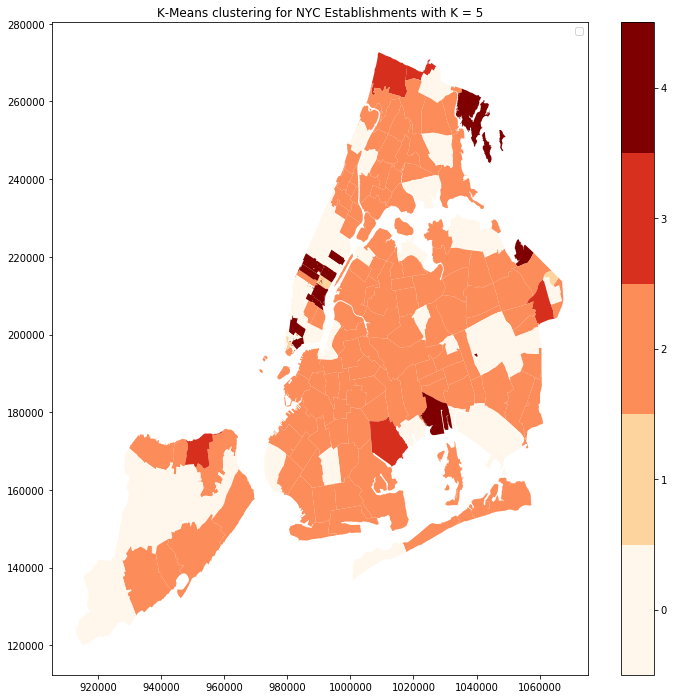

In [137]:
f, ax = plt.subplots(1, figsize=(12, 12))  
#setting for discrete colorbar legend
n = 5
cmap = plt.get_cmap("OrRd", n)
norm= matplotlib.colors.BoundaryNorm(np.arange(0,n+1)-0.5, n)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

nyczipsshp_.plot(column = 'clust', ax = ax, cmap = 'OrRd')
ax.legend(nyczipsshp_['clust'])
f.colorbar(sm, ticks=np.arange(0,n))

ax.set_title('K-Means clustering for NYC Establishments with K = 5')

Fig1: This map show the clustering of NYC zipcodes based on the number of establishments. There are in total 5 clusters. Cluster '2' has the largest share among all clusters. However, it's hard to interpret what do these clusters actually mean.

In [205]:
vals['clust'] = [map_clust(x) for x in vals.index]
vals.head()

,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,est_03,...,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14,clust
zip,,,,,,,,,,,,,,,,,,,,,
10001,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,0
10002,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,0
10003,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,2
10004,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,2
10005,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,...,0.260457,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888,0


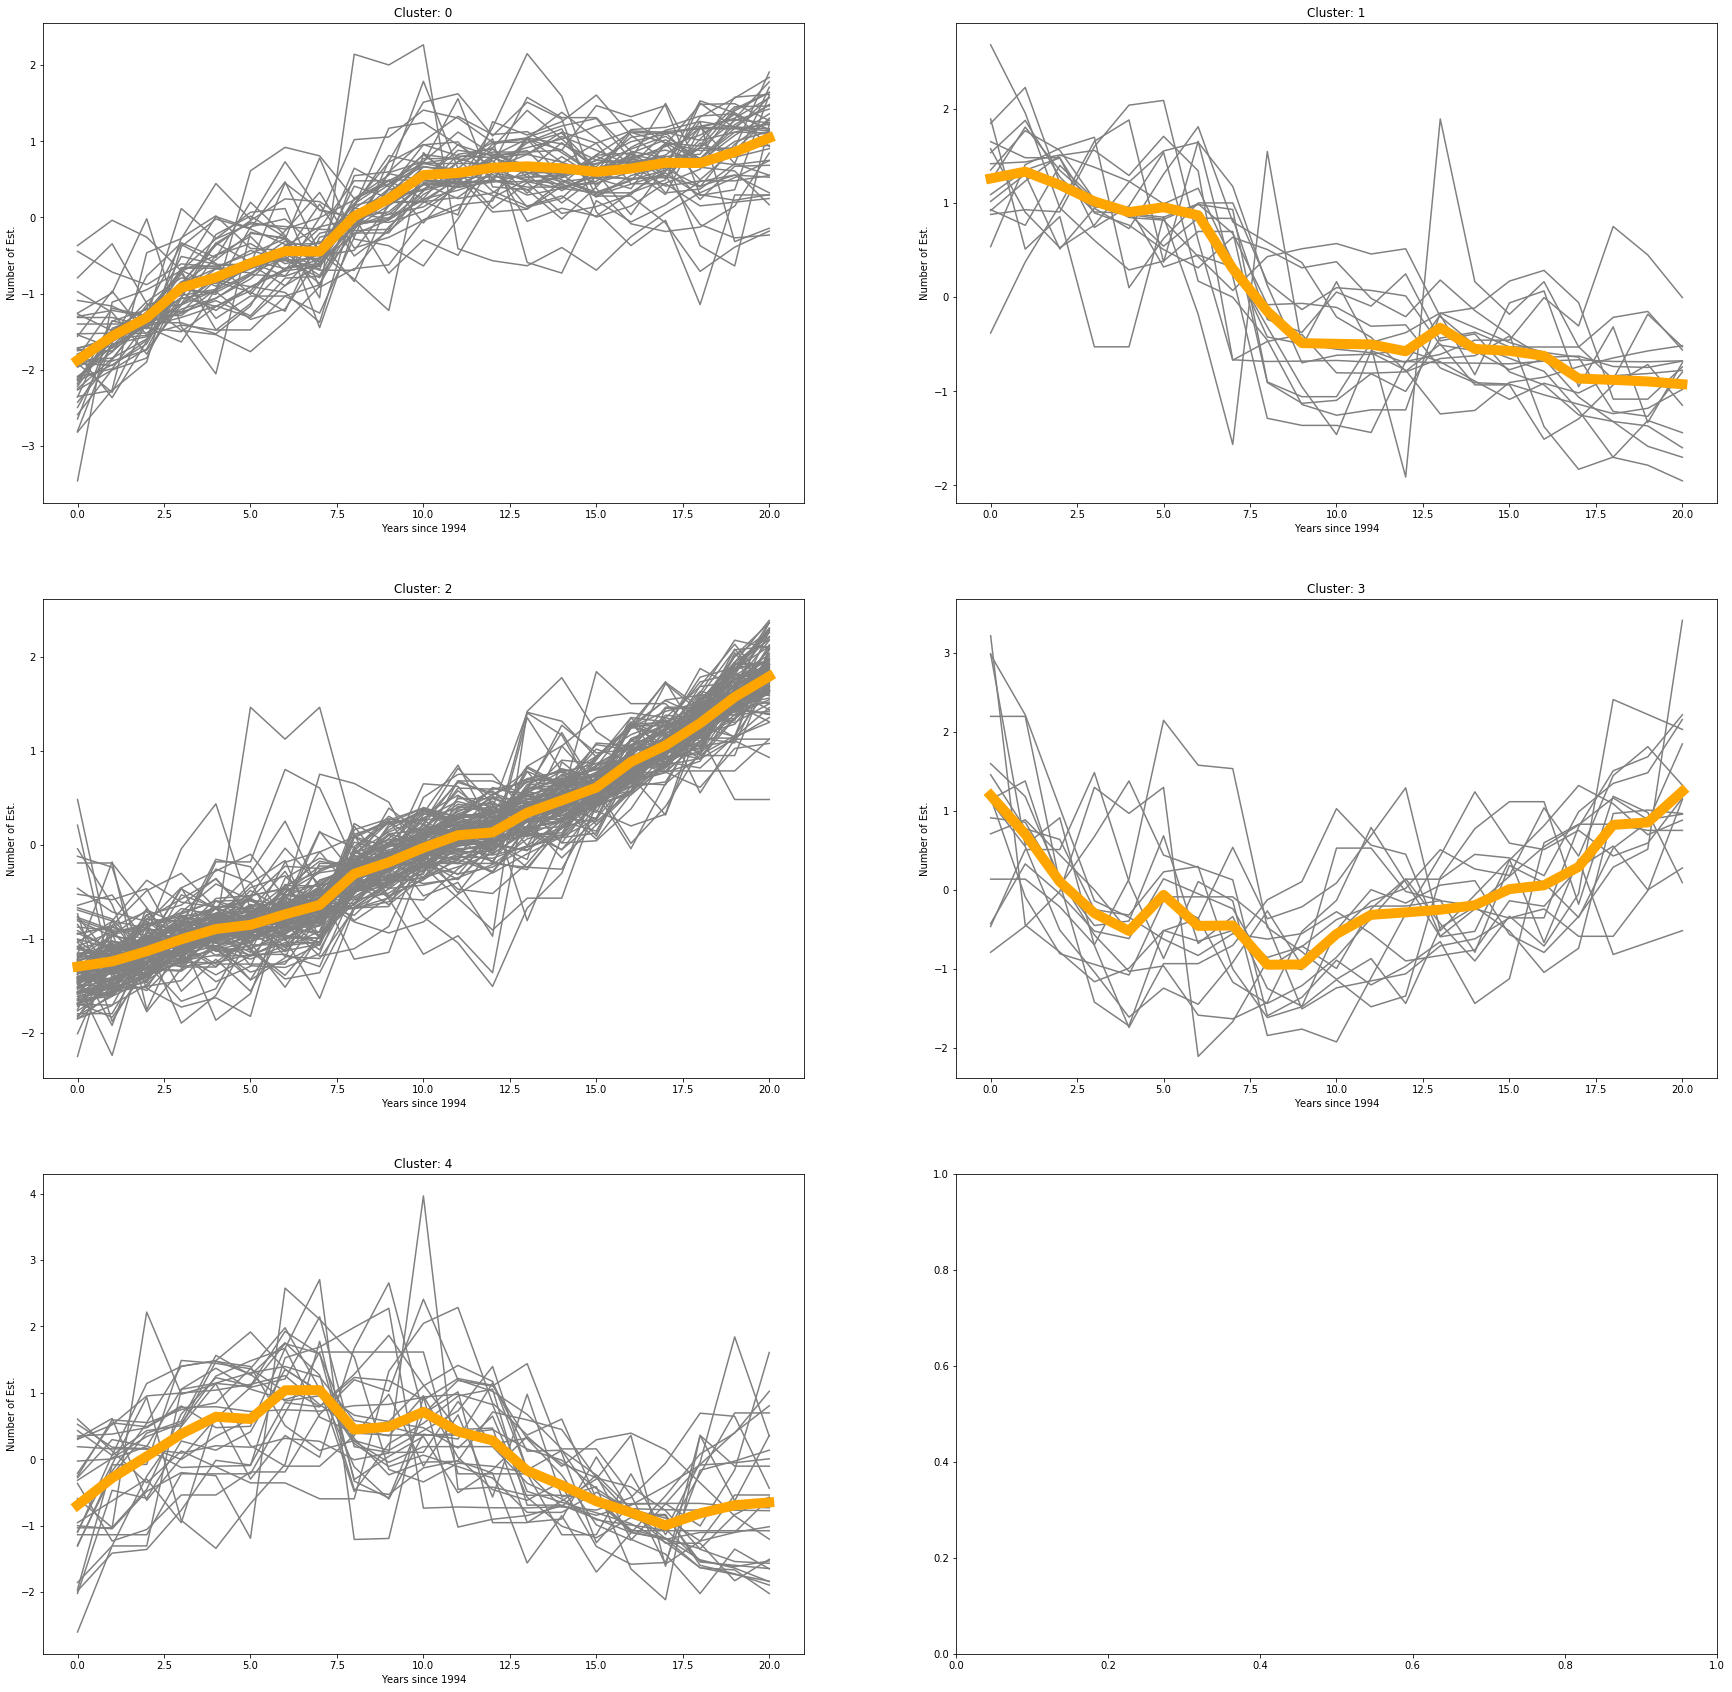

In [206]:
f, axis = plt.subplots(3, 2, figsize=(30,30))


for c in range(max(vals.clust)+1):
    row = c//2
    col = c%2
    plt.subplot(320+(c+1))
    for idx, rows in vals[vals.clust == c].iterrows():
        plt.plot(list(range(vals.shape[1]-1)), rows[:-1], color = 'grey' )
    plt.plot(list(range(vals.shape[1]-1)), km.cluster_centers_[c], color = 'orange', lw =10)
    plt.title('Cluster: %s'%c)
    plt.xlabel('Years since 1994')
    plt.ylabel('Number of Est.')

Fig2: These graphs contain time series from each clusters and their center cluster (shown in orange). The trends for these clusters are apparent. For example, cluster 2 has apparent upward trend, while clusters 4 has inversed U-shape trend.

In [203]:
km.cluster_centers_

array([[-1.87515281, -1.56134551, -1.31713919, -0.92280085, -0.78734841,
        -0.59957887, -0.44217988, -0.44766376,  0.01524826,  0.24518878,
         0.55721582,  0.58491892,  0.65357186,  0.67185731,  0.64580097,
         0.59893487,  0.64281373,  0.71881974,  0.71459262,  0.85971017,
         1.04453623],
       [ 1.26132321,  1.33345523,  1.19285401,  1.0175505 ,  0.90377145,
         0.95570788,  0.86969699,  0.30340269, -0.14995278, -0.48798146,
        -0.49514242, -0.50157118, -0.57417304, -0.32462755, -0.54933889,
        -0.56983899, -0.6235375 , -0.86393959, -0.87855379, -0.89493146,
        -0.92417331],
       [-1.29171708, -1.23656973, -1.12836582, -1.00145662, -0.89209644,
        -0.84798365, -0.73588268, -0.63646533, -0.30538507, -0.18205714,
        -0.02842321,  0.10543359,  0.13552818,  0.34450623,  0.47598443,
         0.61261489,  0.88496644,  1.06095307,  1.29723939,  1.57510731,
         1.79406921],
       [ 1.19436412,  0.70448178,  0.10289564, -0.29593812

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

(905410.75604293647,
 1075212.5382562787,
 112386.35181947277,
 280345.45402395504)

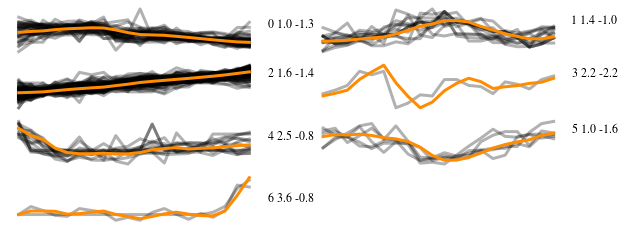

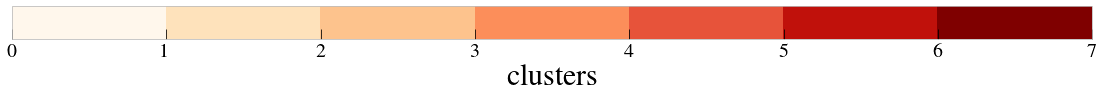

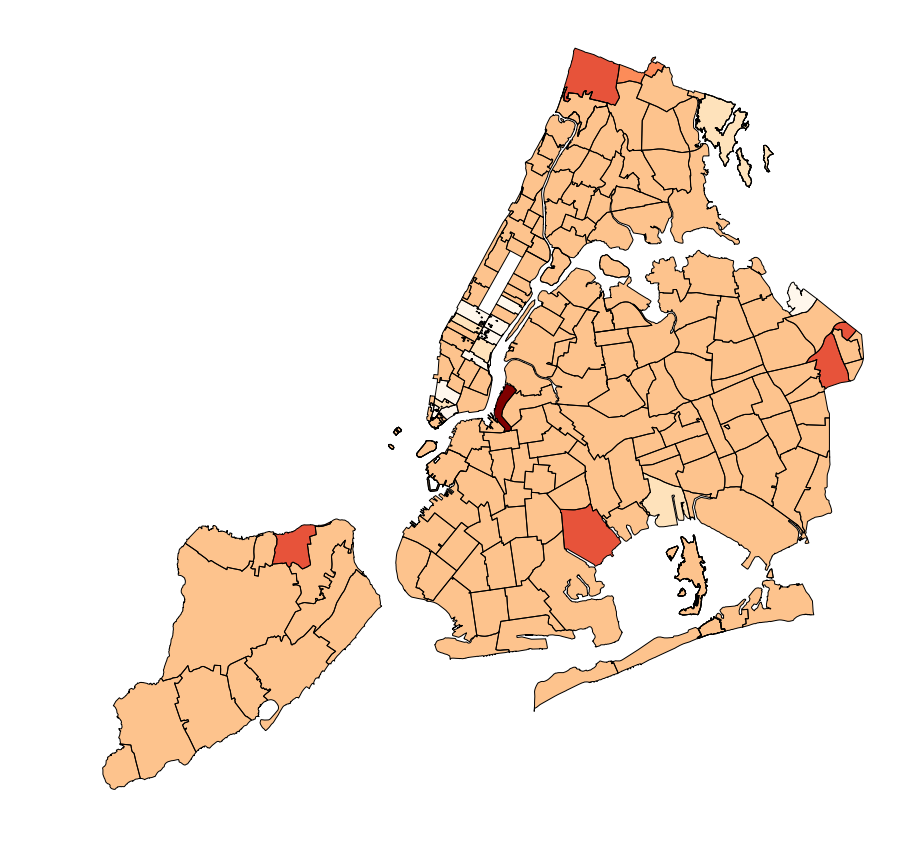

In [29]:
...

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [ ]:
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit()
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))



### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

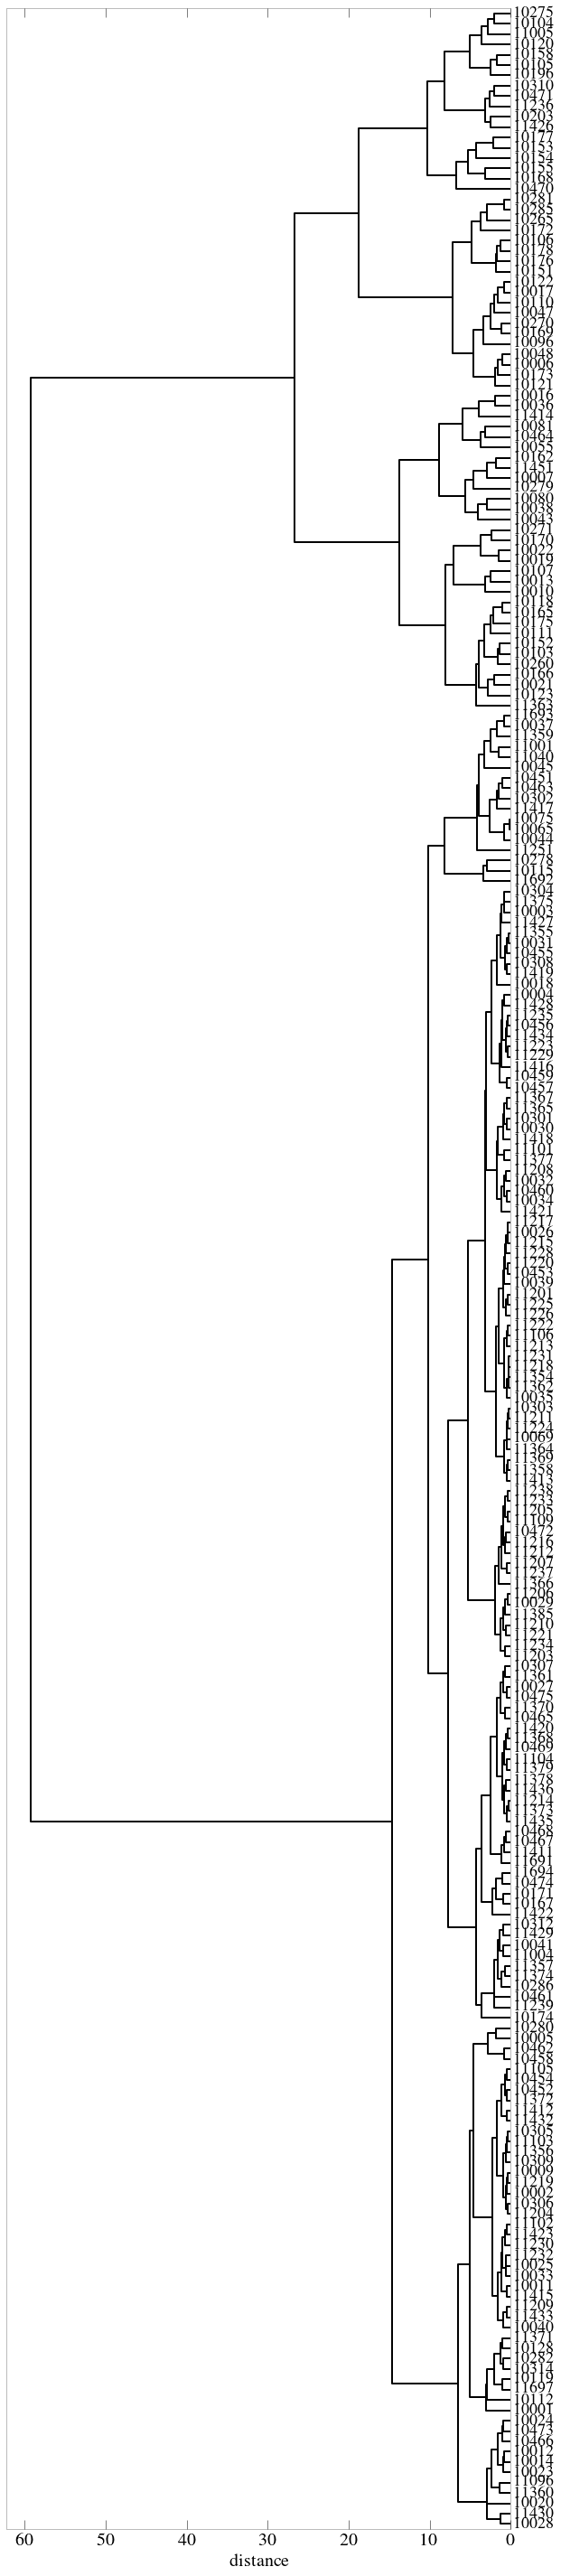

In [1]:
import scipy.cluster as scp
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


In [20]:
!pwd

/nfshome/fb55/PUI2017_fb55/HW11_fb55
